## Part A Variety of CNN Models
Submitted by: Phalguni Rathod | Student No.: R00183770

Checking the NVIDIA GPU Config

In [1]:
!nvidia-smi

Tue May 12 11:52:07 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Setting Tensorflow 2

In [2]:

# Colab has two versions of TensorFlow installed: a 1.x version and a 2.x version. 
# Colab currently uses TF 1.x by default
# To enable TF2 execute the following code

%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)


2.2.0


Mounting Colab Drive

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Unzipping & Extracting Data

In [4]:
!unzip "/content/gdrive/My Drive/data.h5" -d "./"

Archive:  /content/gdrive/My Drive/data.h5.zip
  inflating: ./data1.h5              


Checking the files in current folder, did the data got extracted properly

In [5]:
!ls

data1.h5  gdrive  sample_data


Loading the data

In [6]:
import numpy as np
import h5py


def loadDataH5():
    
    with h5py.File('data1.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        print (trainX.shape,trainY.shape)
        print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY

trainX, trainY, testX, testY = loadDataH5()


(1020, 128, 128, 3) (1020,)
(340, 128, 128, 3) (340,)


Importing required libraries

In [0]:
import os
import gc
import numpy as np
import  matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import tensorflow.keras.layers as L
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras import  backend as K
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img


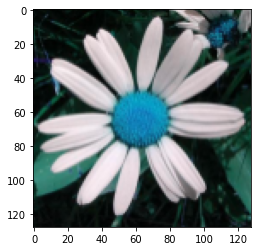

In [8]:
plt.imshow(trainX[512])

In [9]:
trainY.shape

(1020,)

In [10]:
np.unique(trainY).shape

(17,)

### General Steps and function defination

In [0]:
BATCH_SIZE = 64

In [0]:
train_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

In [0]:
train_gen = train_datagen.flow(trainX, trainY, batch_size=BATCH_SIZE)
valid_gen = valid_datagen.flow(testX, testY, batch_size=BATCH_SIZE)

In [0]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n][...,::-1].copy())
      plt.title(label_batch[n])
      plt.axis('off')


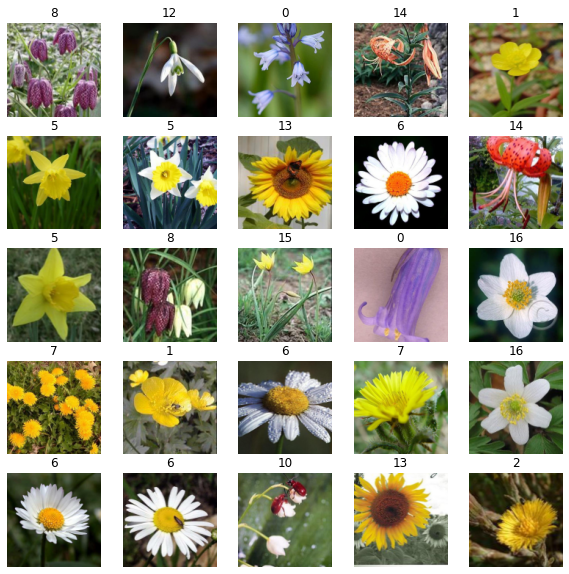

In [15]:
image_batch, label_batch = next(train_gen)
show_batch(image_batch, label_batch)

In [0]:
def show_hist(H):

    plt.style.use("ggplot") # Plotting style
    plt.figure() 
    plt.plot(H.history["loss"], label="train_loss") # Ploting training loss
    plt.plot(H.history["val_loss"], label="val_loss") # Plotting validation loss
    plt.plot(H.history["accuracy"], label="train_acc") # Plotting training accuracy
    plt.plot(H.history["val_accuracy"], label="val_acc") # Plotting validation accuracy
    plt.title("Training Loss and Accuracy") # Giving title to the plot
    plt.xlabel("Epoch #") # Label the x axis
    plt.ylabel("Loss/Accuracy") # Label the y axis
    plt.legend() # Giving legends
    plt.show() # Showing the plot

def show_hist_sep(history):
    
    # history for accuracy
    plt.plot(history.history['accuracy']) # Plotting training accuracy
    plt.plot(history.history['val_accuracy']) # Plotting validation accuracy
    plt.title('model accuracy') # Giving title to the plot
    plt.ylabel('accuracy') # Label the y axis
    plt.xlabel('epoch')# Label the x axis
    plt.legend(['train', 'test'], loc='upper left') # Giving legends
    plt.show() # Showing the plot 
    
    # history for loss
    plt.plot(history.history['loss']) # Plotting training loss
    plt.plot(history.history['val_loss']) # Plotting validation loss
    plt.title('model loss') # Giving title to the plot
    plt.ylabel('loss') # Label the y axis
    plt.xlabel('epoch')# Label the x axis
    plt.legend(['train', 'test'], loc='upper left') # Giving legends
    plt.show() # Showing the plot

### Part A - i: CNN Models and thier variety


Here we are defining a function to generate base model and it's varities. When we pass an n_crp to func it makes that many layers deep CNN.

In [0]:
def get_base_model(n_crp = 1): # Pass the required depth/ # of layers
    model = Sequential() # DEfine Model
    # First Conv Layer
    model.add(L.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu", input_shape=(128, 128, 3)))
    # Max Pool Layer
    model.add(L.MaxPool2D(pool_size=2))
    for i in range (n_crp-1): # Add more layer depending on the arg passed as n_crp
        # Additional Conv Layer
        model.add(L.Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"))
        # Additional MaxPool Layer
        model.add(L.MaxPool2D(pool_size=2)) 

    # Flatten the input for FC Layer
    model.add(L.Flatten())
    # FC LAyer with softmax activation and 17 neurons 
    model.add(L.Dense(17, activation="softmax"))

    return model # Return thr model


## Base model

We are calling the above defined get_base_model func to make the base model with only 


1.  CNN Layer
2.  Max Pool Layer
3. Fully Connected Layer with Softmax



In [0]:
base_model = get_base_model(1) # Passing 1 to get the base model
# Compiling the base model
base_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
                   metrics = ["accuracy"])
# Getting the summary
base_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 17)                2228241   
Total params: 2,228,657
Trainable params: 2,228,657
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Checkpointing
fname =  "/content/gdrive/My Drive/Assignment_data/partA/a/base_model_2_weights.{epoch:02d}-{val_loss:.2f}.hdf5"
ckpt = tf.keras.callbacks.ModelCheckpoint(fname, 
                                                monitor="val_loss",
                                                mode="min", 
                                                save_best_only=True, 
                                                verbose=1
                                                )

In [0]:
# Fitting the model
base_hist = base_model.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=50,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size, 
                           callbacks = [ckpt])

Epoch 1/50
15/15 [==============================] - ETA: 0s - loss: 2.7426 - accuracy: 0.1182
Epoch 00001: val_loss improved from inf to 2.62519, saving model to /content/gdrive/My Drive/Assignment_data/partA/a/base_model_2_weights.01-2.63.hdf5
15/15 [==============================] - 4s 259ms/step - loss: 2.7426 - accuracy: 0.1182 - val_loss: 2.6252 - val_accuracy: 0.1813
Epoch 2/50
15/15 [==============================] - ETA: 0s - loss: 2.4353 - accuracy: 0.2375
Epoch 00002: val_loss improved from 2.62519 to 2.33921, saving model to /content/gdrive/My Drive/Assignment_data/partA/a/base_model_2_weights.02-2.34.hdf5
15/15 [==============================] - 4s 256ms/step - loss: 2.4353 - accuracy: 0.2375 - val_loss: 2.3392 - val_accuracy: 0.2688
Epoch 3/50
15/15 [==============================] - ETA: 0s - loss: 2.1978 - accuracy: 0.3295
Epoch 00003: val_loss improved from 2.33921 to 2.13446, saving model to /content/gdrive/My Drive/Assignment_data/partA/a/base_model_2_weights.03-2.13.

In [0]:
!ls

data1.h5  gdrive  sample_data


Let's Observe the Loss & Accuracy Curve

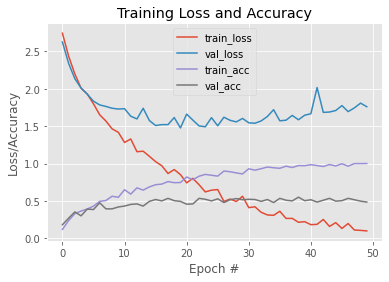

In [0]:
show_hist(base_hist)

**Observation**
Training - Validation loss is diverging from 8th epoch, hence starts overfitting the data, that can be observed by by drop in validation accuracy and training accuracy.

### Base model Extended 1
Using 1 Conv(64)->Pool(2) didn't have much impact on train and validation loss as well as accuracies.

BATCH_SIZE = 64
time per step: 20ms

In [0]:
gc.collect()

7196

In [0]:
# increasing Conv(64) -> Pool (2) to two repetitions
base_model_1 = get_base_model(2)
# Compiling the base_model_1
base_model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
                   metrics = ["accuracy"])

base_model_1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 64, 64, 32)        4128      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 17)                557073    
Total params: 561,617
Trainable params: 561,617
Non-trainable params: 0
________________________________________________

In [0]:
# Fitting the extension model 1, with 20 epochs
base_hist_1 = base_model_1.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=50,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size, 
                           callbacks = [])

Epoch 1/50
15/15 [==============================] - 6s 400ms/step - loss: 2.8336 - accuracy: 0.0635 - val_loss: 2.8109 - val_accuracy: 0.1187
Epoch 2/50
15/15 [==============================] - 6s 407ms/step - loss: 2.7903 - accuracy: 0.1402 - val_loss: 2.7722 - val_accuracy: 0.2250
Epoch 3/50
15/15 [==============================] - 6s 400ms/step - loss: 2.7465 - accuracy: 0.1747 - val_loss: 2.7218 - val_accuracy: 0.1875
Epoch 4/50
15/15 [==============================] - 6s 402ms/step - loss: 2.6636 - accuracy: 0.2040 - val_loss: 2.6096 - val_accuracy: 0.2531
Epoch 5/50
15/15 [==============================] - 6s 402ms/step - loss: 2.5450 - accuracy: 0.2636 - val_loss: 2.4640 - val_accuracy: 0.2875
Epoch 6/50
15/15 [==============================] - 6s 402ms/step - loss: 2.3685 - accuracy: 0.2877 - val_loss: 2.3440 - val_accuracy: 0.2625
Epoch 7/50
15/15 [==============================] - 6s 402ms/step - loss: 2.2113 - accuracy: 0.3054 - val_loss: 2.2108 - val_accuracy: 0.2500
Epoch 

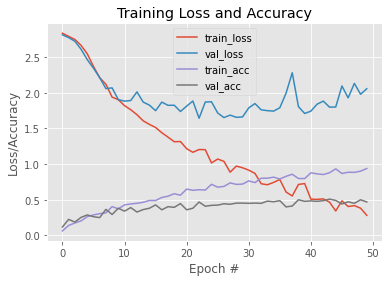

In [0]:
show_hist(base_hist_1)
# show_hist_sep(base_hist_1)


Using (Conv(64)->Pool(2)) X 2, we can see train accuracy exponentialy increasing whilw valid accuracy is also showing improvements

**Repeating Pooling twice reduces the number of paramets passed to Dense layer**
This might help Conv layers learn more features in the second Conv layer

loss as well as accuracies.

BATCH_SIZE = 64
time per step: 23ms

### Base model Extended 2

In [0]:
gc.collect()

7619

In [0]:
#increasing Conv(64) -> Pool (2) to three repetitions
base_model_2 = get_base_model(3)
base_model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
                   metrics = ["accuracy"])

base_model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 32)        4128      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 8192)             

See the number of parameteres reduced!
Means the data coming to Dense Layer is passed through more Convolution Filters

In [0]:
base_hist_2 = base_model_2.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=50,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size, 
                           callabacks = [])

Epoch 1/50
15/15 [==============================] - 7s 446ms/step - loss: 2.8329 - accuracy: 0.0523 - val_loss: 2.8175 - val_accuracy: 0.0625
Epoch 2/50
15/15 [==============================] - 7s 438ms/step - loss: 2.8161 - accuracy: 0.0544 - val_loss: 2.8007 - val_accuracy: 0.0719
Epoch 3/50
15/15 [==============================] - 7s 442ms/step - loss: 2.7963 - accuracy: 0.0753 - val_loss: 2.7830 - val_accuracy: 0.0719
Epoch 4/50
15/15 [==============================] - 7s 440ms/step - loss: 2.7652 - accuracy: 0.1088 - val_loss: 2.7593 - val_accuracy: 0.0625
Epoch 5/50
15/15 [==============================] - 7s 441ms/step - loss: 2.7424 - accuracy: 0.1213 - val_loss: 2.7199 - val_accuracy: 0.1437
Epoch 6/50
15/15 [==============================] - 7s 442ms/step - loss: 2.6988 - accuracy: 0.1810 - val_loss: 2.6722 - val_accuracy: 0.1781
Epoch 7/50
15/15 [==============================] - 7s 444ms/step - loss: 2.6449 - accuracy: 0.1914 - val_loss: 2.5947 - val_accuracy: 0.2250
Epoch 

Plotting the graphs

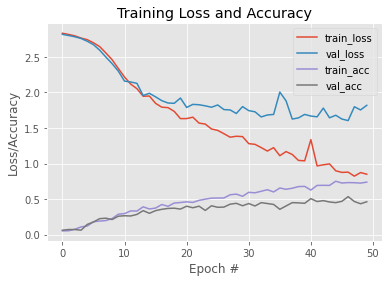

In [0]:
show_hist(base_hist_2)
# show_hist_sep(base_hist_2)


Using (Conv(64)->Pool(2)) X 2, we can see train accuracy exponentialy increasing whilw valid accuracy is also showing improvements

**Repeting Pooling twice reduces the number of paramets passed to Dense layer**
This might help Conv layers learn more features in the secon Conv layer

loss as well as accuracies.

BATCH_SIZE = 64
time per step: 23ms

### Base model Extended 3

In [0]:
gc.collect()

8047

In [0]:
#increasing Conv(64) -> Pool (2) to 6 repetitions
base_model_3 = get_base_model(4)
base_model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
                   metrics = ["accuracy"])

base_model_3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 64, 64, 32)        4128      
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 32)      

See the number of parameteres reduced!
Means the data coming to Dense Layer is passed through more Convolution Filters

In [0]:
base_hist_3 = base_model_3.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=50,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size, 
                           callabacks = [])

Epoch 1/50
15/15 [==============================] - 7s 464ms/step - loss: 2.8329 - accuracy: 0.0523 - val_loss: 2.8294 - val_accuracy: 0.0437
Epoch 2/50
15/15 [==============================] - 7s 461ms/step - loss: 2.8304 - accuracy: 0.0575 - val_loss: 2.8254 - val_accuracy: 0.0562
Epoch 3/50
15/15 [==============================] - 7s 456ms/step - loss: 2.8239 - accuracy: 0.0659 - val_loss: 2.8230 - val_accuracy: 0.0500
Epoch 4/50
15/15 [==============================] - 7s 457ms/step - loss: 2.8219 - accuracy: 0.0492 - val_loss: 2.8197 - val_accuracy: 0.0531
Epoch 5/50
15/15 [==============================] - 7s 457ms/step - loss: 2.8149 - accuracy: 0.0669 - val_loss: 2.8143 - val_accuracy: 0.0594
Epoch 6/50
15/15 [==============================] - 7s 456ms/step - loss: 2.8120 - accuracy: 0.0649 - val_loss: 2.8087 - val_accuracy: 0.0719
Epoch 7/50
15/15 [==============================] - 7s 457ms/step - loss: 2.8016 - accuracy: 0.0858 - val_loss: 2.8010 - val_accuracy: 0.0781
Epoch 

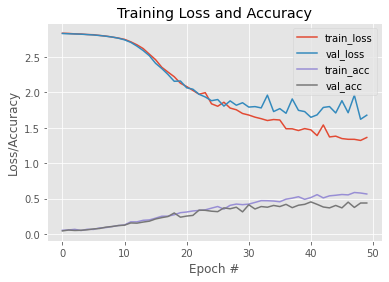

In [0]:
show_hist(base_hist_3)
# show_hist_sep(base_hist_3)


Using (Conv(64)->Pool(2)) X 2, we can see train accuracy exponentialy increasing whilw valid accuracy is also showing improvements

**Repeting Pooling twice reduces the number of paramets passed to Dense layer**
This might help Conv layers learn more features in the secon Conv layer

**Conclusion: As the network grows bigger, We need more training, even with less parameters compared to a shallow network because of Conv. layers. however, Accuracy may increase after more training**

BATCH_SIZE = 64
time per step: 23ms

## Data Augmentations
As the dataset is very limited we are creating more samples by augmenting the data we have. Data can be augmented in variety of ways like, rotating the image, flipping it, zooming in/out and multiple combination of all these.

In [0]:
train_datagen = ImageDataGenerator(
	rotation_range=15,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.01,
	zoom_range=[0.9, 1.25],
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="reflect"
)
valid_datagen = ImageDataGenerator(
	rotation_range=15,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.01,
	zoom_range=[0.9, 1.25],
	horizontal_flip=True,
	vertical_flip=True,
	fill_mode="reflect"
)

In [0]:
train_gen = train_datagen.flow(trainX, trainY, batch_size=BATCH_SIZE)
valid_gen = valid_datagen.flow(testX, testY, batch_size=BATCH_SIZE)

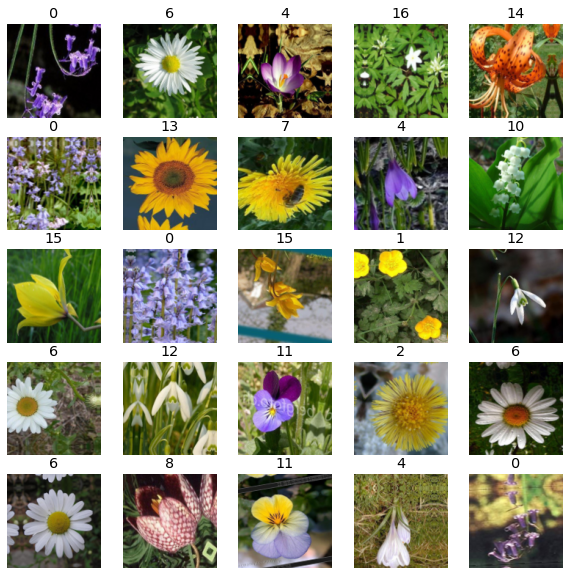

In [0]:
image_batch, label_batch = next(train_gen)
show_batch(image_batch, label_batch)


## Base model Extended 2 Aug

In [0]:
gc.collect()

45832

In [0]:
#increasing Conv(64) -> Pool (2) to two repetitions
base_model_2_aug = get_base_model(3)
base_model_2_aug.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
                   metrics = ["accuracy"])

base_model_2_aug.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 64, 64, 32)        4128      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)            

*See* the number of parameteres reduced!
Means the data coming to Dense Layer is passed through more Convolution Filters

In [0]:
ckpt = tf.keras.callbacks.ModelCheckpoint(
    "/content/gdrive/My Drive/Assignment_data/partA/a/base_model_2_weights.{epoch:02d}-{val_loss:.2f}.hdf5", 
    monitor='val_loss', verbose=0, save_best_only=False,
    save_weights_only=False, mode='auto', save_freq='epoch'
)

In [0]:
base_hist_2_aug = base_model_2_aug.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=50,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size, 
                           callbacks = [])

Epoch 1/50
15/15 [==============================] - 9s 593ms/step - loss: 2.8419 - accuracy: 0.0554 - val_loss: 2.8388 - val_accuracy: 0.0594
Epoch 2/50
15/15 [==============================] - 9s 595ms/step - loss: 2.8302 - accuracy: 0.0562 - val_loss: 2.8299 - val_accuracy: 0.0875
Epoch 3/50
15/15 [==============================] - 9s 594ms/step - loss: 2.8235 - accuracy: 0.0826 - val_loss: 2.8249 - val_accuracy: 0.0938
Epoch 4/50
15/15 [==============================] - 9s 592ms/step - loss: 2.8171 - accuracy: 0.0900 - val_loss: 2.8173 - val_accuracy: 0.1187
Epoch 5/50
15/15 [==============================] - 9s 593ms/step - loss: 2.8078 - accuracy: 0.1088 - val_loss: 2.8079 - val_accuracy: 0.1156
Epoch 6/50
15/15 [==============================] - 9s 591ms/step - loss: 2.7959 - accuracy: 0.1172 - val_loss: 2.8062 - val_accuracy: 0.1031
Epoch 7/50
15/15 [==============================] - 9s 592ms/step - loss: 2.7923 - accuracy: 0.1360 - val_loss: 2.7908 - val_accuracy: 0.1094
Epoch 

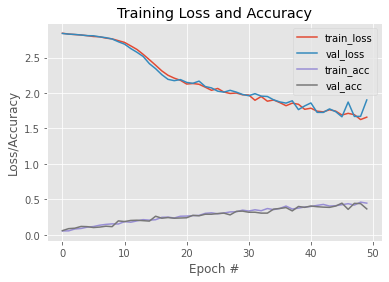

In [0]:
show_hist(base_hist_2_aug)

In [0]:
base_hist_2_aug_100 = base_model_2_aug.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=100,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size, 
                           callbacks = [])

Epoch 1/100
15/15 [==============================] - 9s 611ms/step - loss: 1.5776 - accuracy: 0.4864 - val_loss: 1.5710 - val_accuracy: 0.4281
Epoch 2/100
15/15 [==============================] - 9s 597ms/step - loss: 1.5935 - accuracy: 0.4665 - val_loss: 1.5881 - val_accuracy: 0.4688
Epoch 3/100
15/15 [==============================] - 9s 599ms/step - loss: 1.5824 - accuracy: 0.4791 - val_loss: 1.6270 - val_accuracy: 0.4250
Epoch 4/100
15/15 [==============================] - 9s 596ms/step - loss: 1.6212 - accuracy: 0.4812 - val_loss: 1.5792 - val_accuracy: 0.4625
Epoch 5/100
15/15 [==============================] - 9s 597ms/step - loss: 1.5604 - accuracy: 0.4969 - val_loss: 1.5955 - val_accuracy: 0.4688
Epoch 6/100
15/15 [==============================] - 9s 606ms/step - loss: 1.5404 - accuracy: 0.4969 - val_loss: 1.5159 - val_accuracy: 0.4969
Epoch 7/100
15/15 [==============================] - 9s 604ms/step - loss: 1.5498 - accuracy: 0.4854 - val_loss: 1.7998 - val_accuracy: 0.4125

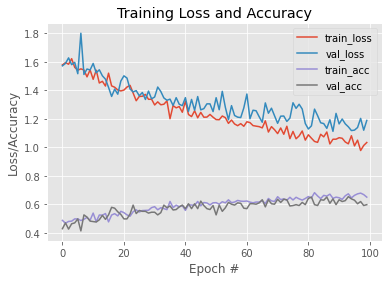

In [0]:
show_hist(base_hist_2_aug_100)

Using (Conv(64)->Pool(2)) X 2, with augumentations we can see train accuracy exponentialy increasing whilw valid accuracy is also showing improvements. 

**Another thing to note is the robustness of training.**
The convergence is way smoother with aug. 
A reason could be variety of data that it is being trained on.

BATCH_SIZE = 64
Epochs = 20


## Base model Extended 3 Aug

In [0]:
gc.collect()

8047

In [0]:
#increasing Conv(64) -> Pool (2) to 4 repetitions
base_model_3_aug = get_base_model(4)
base_model_3_aug.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
                   metrics = ["accuracy"])

base_model_3_aug.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 128, 128, 32)      416       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 32)        4128      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 16, 16, 32)      

See the nu,ber of parameteres reduced!
Means the data coming to Dense Layer is passed through more Convolution Filters

In [0]:
base_hist_3_aug = base_model_3_aug.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=50,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size, 
                           callabacks = [])

Epoch 1/50
15/15 [==============================] - 9s 602ms/step - loss: 2.8361 - accuracy: 0.0677 - val_loss: 2.8333 - val_accuracy: 0.0688
Epoch 2/50
15/15 [==============================] - 9s 600ms/step - loss: 2.8304 - accuracy: 0.0722 - val_loss: 2.8304 - val_accuracy: 0.0750
Epoch 3/50
15/15 [==============================] - 9s 595ms/step - loss: 2.8281 - accuracy: 0.0690 - val_loss: 2.8297 - val_accuracy: 0.0719
Epoch 4/50
15/15 [==============================] - 9s 599ms/step - loss: 2.8275 - accuracy: 0.0847 - val_loss: 2.8288 - val_accuracy: 0.0844
Epoch 5/50
15/15 [==============================] - 9s 595ms/step - loss: 2.8241 - accuracy: 0.0900 - val_loss: 2.8291 - val_accuracy: 0.0812
Epoch 6/50
15/15 [==============================] - 9s 596ms/step - loss: 2.8246 - accuracy: 0.0785 - val_loss: 2.8230 - val_accuracy: 0.0938
Epoch 7/50
15/15 [==============================] - 9s 593ms/step - loss: 2.8237 - accuracy: 0.0837 - val_loss: 2.8246 - val_accuracy: 0.0812
Epoch 

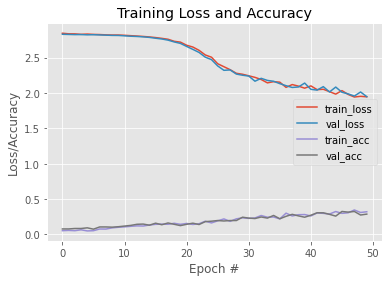

In [0]:
# list all data in history
show_hist(base_hist_3_aug)

In [0]:
base_hist_3_aug_100 = base_model_3_aug.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=100,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size, 
                           callabacks = [])

Epoch 1/100
15/15 [==============================] - 9s 597ms/step - loss: 1.9507 - accuracy: 0.3180 - val_loss: 1.9499 - val_accuracy: 0.3000
Epoch 2/100
15/15 [==============================] - 9s 600ms/step - loss: 1.9009 - accuracy: 0.3441 - val_loss: 1.9247 - val_accuracy: 0.3094
Epoch 3/100
15/15 [==============================] - 9s 598ms/step - loss: 1.9218 - accuracy: 0.3075 - val_loss: 1.9878 - val_accuracy: 0.3187
Epoch 4/100
15/15 [==============================] - 9s 598ms/step - loss: 1.8949 - accuracy: 0.3421 - val_loss: 1.9764 - val_accuracy: 0.3031
Epoch 5/100
15/15 [==============================] - 9s 595ms/step - loss: 1.9113 - accuracy: 0.3525 - val_loss: 1.9504 - val_accuracy: 0.3469
Epoch 6/100
15/15 [==============================] - 9s 598ms/step - loss: 1.8714 - accuracy: 0.3525 - val_loss: 1.9538 - val_accuracy: 0.3031
Epoch 7/100
15/15 [==============================] - 9s 595ms/step - loss: 1.9141 - accuracy: 0.3483 - val_loss: 1.9448 - val_accuracy: 0.3531

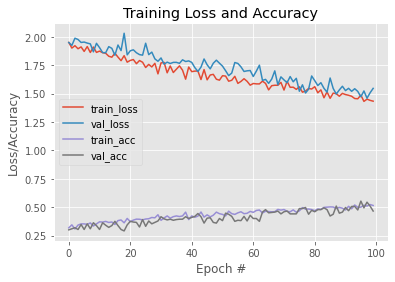

In [0]:
show_hist(base_hist_3_aug_100)

Using (Conv(64)->Pool(2)) X 6, we can see train accuracy exponentialy increasing whilw valid accuracy is also showing improvements

**The convergence isn't smoother than a shallow network. Maybe this can be imporoved by introducing regularizarion and lower Learning Rate

Similar convergence, except that we need more training as Conv layers increase


BATCH_SIZE = 64
Epochs = 20

## PART A - ii Ensemble : Fixed Arch & Pre-trained 

### Fixed Architecture

In [75]:
K.image_data_format()

'channels_last'

In [0]:
def get_base_model_ensemble(n_classes=17, compiled=True, lr= .01):
    """
    visible = Input(shape=(128, 128, 3))
    conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    flat = Flatten()(pool2)
    hidden1 = Dense(10, activation='relu')(flat)
    output = Dense(1, activation='sigmoid')(hidden1)
    model = Model(inputs=visible, outputs=output)
    """
    #Shallow VGG
    chanDim = -1 #Channel Last
    model = Sequential()
    # CONV => RELU => POOL
    model.add(L.Conv2D(32, (3, 3), padding="same",
    input_shape=(128, 128, 3), activation='relu'))
    model.add(L.Conv2D(32, (3, 3), padding="same",activation='relu'))
    model.add(L.MaxPooling2D(pool_size=(2, 2)))

    # second CONV => CONV => POOL layer set
    model.add(L.Conv2D(64, (3, 3), padding="same",activation='relu'))
    model.add(L.Conv2D(64, (3, 3), padding="same",activation='relu'))
    model.add(L.MaxPooling2D(pool_size=(2, 2)))

    model.add(L.Conv2D(32, (3, 3), padding="same",activation='relu'))
    model.add(L.Conv2D(32, (3, 3), padding="same",activation='relu'))
    model.add(L.MaxPooling2D(pool_size=(2, 2)))

    # first (and only) set of FC => RELU layers
    model.add(L.Flatten())
    #model.add(L.Dense(512,activation='relu'))

    # softmax classifier
    model.add(L.Dense(n_classes, activation='softmax'))

    if compiled:
        model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.SGD(learning_rate=lr),
                   metrics = ["accuracy"])

    return model

In [0]:
# ckpt = tf.keras.callbacks.ModelCheckpoint(
#         filepath='./mymodel_{epoch}',
#         save_best_only=True,
#         monitor='val_loss',
#         verbose=1)


In [77]:
%%time
num_ensembles = 5
hist_list_fix = []
model_list_fix = []
valid_preds_list_fix = []
for i in range(num_ensembles):
    print(f"Model # {i+1}")
    model_e = get_base_model_ensemble(lr=0.01)
    hist_e = model_e.fit(train_gen,
                           steps_per_epoch = train_gen.n//train_gen.batch_size, 
                           epochs=20,
                           validation_data=valid_gen,
                           validation_steps=valid_gen.n//valid_gen.batch_size 
                           )
    ps = model_e.predict(testX, verbose=1)

    hist_list_fix.append(hist_e)
    model_list_fix.append(model_e)
    valid_preds_list_fix.append(ps)
    gc.collect()

Model # 1
Epoch 1/20
15/15 [==============================] - 1s 91ms/step - loss: 2.8320 - accuracy: 0.0785 - val_loss: 2.8301 - val_accuracy: 0.0875
Epoch 2/20
15/15 [==============================] - 1s 45ms/step - loss: 2.8284 - accuracy: 0.1036 - val_loss: 2.8280 - val_accuracy: 0.1031
Epoch 3/20
15/15 [==============================] - 1s 45ms/step - loss: 2.8270 - accuracy: 0.1015 - val_loss: 2.8262 - val_accuracy: 0.1031
Epoch 4/20
15/15 [==============================] - 1s 45ms/step - loss: 2.8241 - accuracy: 0.1021 - val_loss: 2.8250 - val_accuracy: 0.1000
Epoch 5/20
15/15 [==============================] - 1s 45ms/step - loss: 2.8200 - accuracy: 0.1172 - val_loss: 2.8181 - val_accuracy: 0.1312
Epoch 6/20
15/15 [==============================] - 1s 45ms/step - loss: 2.8146 - accuracy: 0.1172 - val_loss: 2.8133 - val_accuracy: 0.1125
Epoch 7/20
15/15 [==============================] - 1s 45ms/step - loss: 2.8029 - accuracy: 0.1433 - val_loss: 2.8022 - val_accuracy: 0.1187
Epo

### Plots for each model

Model # 1


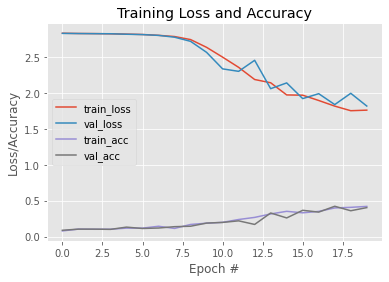

Model # 2


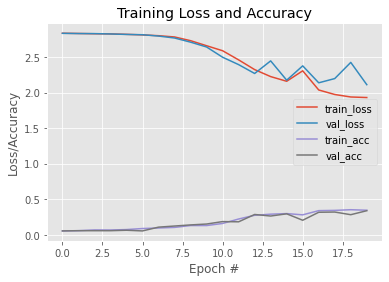

Model # 3


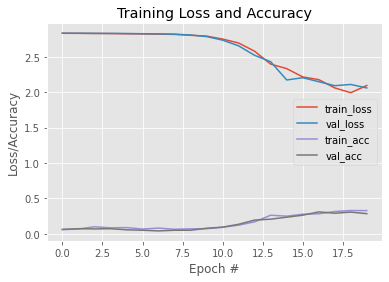

Model # 4


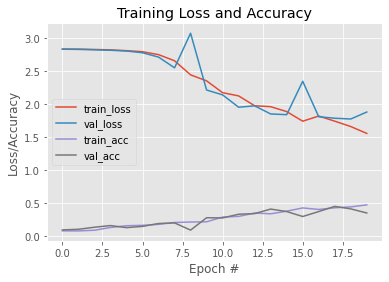

Model # 5


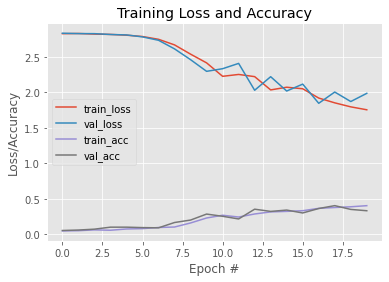

In [78]:
for i in range(num_ensembles):
    print(f"Model # {i+1}")
    show_hist(hist_list_fix[i])

**After seeing loss landscape, We can say that the optimization went litle differently for each base model of ensemble**

In [0]:
ens_preds_fix = np.array(valid_preds_list_fix)
ens_mean_fix = np.mean(ens_preds_fix, 0)
ens_preds_fix = np.argmax(ens_mean_fix, 1)

In [80]:
print(f"Ensemble Model and accuracy {accuracy_score(ens_preds_fix, testY)}")
for i in range(num_ensembles):
    model_e_fix = model_list_fix[i]
    preds_fix = model_e_fix.predict(testX)
    preds_fix = np.argmax(preds_fix, 1)
    print(f"Model # {i+1} and accuracy {accuracy_score(preds_fix, testY)}")

Ensemble Model and accuracy 0.3911764705882353
Model # 1 and accuracy 0.40294117647058825
Model # 2 and accuracy 0.3411764705882353
Model # 3 and accuracy 0.2911764705882353
Model # 4 and accuracy 0.34705882352941175
Model # 5 and accuracy 0.32941176470588235


### Pretrained

In [38]:
K.image_data_format()

'channels_last'

A function to add few new layers to match the 17 class classification using softmax for our dataset

In [0]:
#using Functional API
def get_pretrained_model_ckp(base_model, n_classes=17, freeze_last = 7, lr=0.01):
    x=base_model.output
    x=L.GlobalAveragePooling2D()(x)
    x=L.Dense(128,activation='relu')(x)
    x=L.Dropout(0.3)(x)
    preds=L.Dense(17,activation='softmax')(x) #final layer with softmax activation

    model=tf.keras.models.Model(inputs=base_model.input,outputs=preds)
    for layer in model.layers:
        layer.trainable=False
    for layer in model.layers[-7:]:
        layer.trainable=True

    model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr), 
              metrics=["accuracy"])

    return model

### Pre Trained Models: ResNet, DenseNet, MobileNet - Base Learners

In [0]:
pre_trained_models = []
resnet = tf.keras.applications.ResNet50V2(include_top=False, weights="imagenet", input_shape=(128, 128, 3))
densenet = tf.keras.applications.DenseNet121(include_top=False, weights="imagenet", input_shape=(128, 128, 3))
mobilenet = tf.keras.applications.MobileNetV2(include_top=False, weights="imagenet", input_shape=(128, 128, 3))

In [0]:
# Add them into single list
pre_trained_models.append(resnet)
pre_trained_models.append(densenet)
pre_trained_models.append(mobilenet)

In [30]:
gc.collect()

3038

File locations to store the checkpoints

In [0]:
fname1 = '/content/gdrive/My Drive/checkpoint_a_ii/model1/base_model_weights.{epoch:02d}-{val_loss:.2f}.hdf5'
fname2 = '/content/gdrive/My Drive/checkpoint_a_ii/model2/base_model_weights.{epoch:02d}-{val_loss:.2f}.hdf5'
fname3 = '/content/gdrive/My Drive/checkpoint_a_ii/model3/base_model_weights.{epoch:02d}-{val_loss:.2f}.hdf5'


### Training Base Learner 1: Resnet
Training the model as well as creating checkpoints to save the weights of model with minimum Validation loss


In [49]:
hist_list = []
model_list = []
valid_preds_list = []
model_e_1 = get_pretrained_model_ckp(pre_trained_models[0])
ckpt1 = tf.keras.callbacks.ModelCheckpoint(fname1, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
hist_e_1 = model_e_1.fit(train_gen,
                        steps_per_epoch = train_gen.n//train_gen.batch_size, 
                        epochs=20,
                        validation_data=valid_gen,
                        validation_steps=valid_gen.n//valid_gen.batch_size, 
                        callbacks = [ckpt1])

hist_list.append(hist_e_1)

gc.collect()

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 2.8849 - accuracy: 0.1077
Epoch 00001: val_loss improved from inf to 2.36509, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model1/base_model_weights.01-2.37.hdf5
15/15 [==============================] - 3s 212ms/step - loss: 2.8849 - accuracy: 0.1077 - val_loss: 2.3651 - val_accuracy: 0.3125
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.3701 - accuracy: 0.2793
Epoch 00002: val_loss improved from 2.36509 to 1.99062, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model1/base_model_weights.02-1.99.hdf5
15/15 [==============================] - 1s 96ms/step - loss: 2.3701 - accuracy: 0.2793 - val_loss: 1.9906 - val_accuracy: 0.4406
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 2.0422 - accuracy: 0.4079
Epoch 00003: val_loss improved from 1.99062 to 1.75476, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model1/base_model_weights.03-1.75.hdf5
15/15

216

Loading the check point of best validation loss and using it to do prediction.

In [66]:
#Load Checlp[ointed Model
valid_preds_list = []
model_e_1 = get_pretrained_model_ckp(pre_trained_models[0])
model_e_1.load_weights("/content/gdrive/My Drive/checkpoint_a_ii/model1/base_model_weights.20-0.69.hdf5")
opt = tf.keras.optimizers.SGD(lr=0.01)
model_e_1.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

ps = model_e_1.predict(testX, verbose=1)

model_list.append(model_e_1)
valid_preds_list.append(ps)
print(len(ps[0]))

11/11 [==============================] - 0s 23ms/step
17


### Training Base Learner 2: DenseNet



Training the model as well as creating checkpoints to save the weights of model with minimum Validation loss

In [51]:
model_e_2 = get_pretrained_model_ckp(pre_trained_models[1])
ckpt2 = tf.keras.callbacks.ModelCheckpoint(fname2, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
hist_e_2 = model_e_2.fit(train_gen,
                        steps_per_epoch = train_gen.n//train_gen.batch_size, 
                        epochs=20,
                        validation_data=valid_gen,
                        validation_steps=valid_gen.n//valid_gen.batch_size, 
                        callbacks = [ckpt2])
hist_list.append(hist_e_2)
gc.collect()

Epoch 1/20
15/15 [==============================] - ETA: 0s - loss: 3.1166 - accuracy: 0.1036
Epoch 00001: val_loss improved from inf to 2.31322, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model2/base_model_weights.01-2.31.hdf5
15/15 [==============================] - 4s 254ms/step - loss: 3.1166 - accuracy: 0.1036 - val_loss: 2.3132 - val_accuracy: 0.2750
Epoch 2/20
15/15 [==============================] - ETA: 0s - loss: 2.4186 - accuracy: 0.2406
Epoch 00002: val_loss improved from 2.31322 to 1.87726, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model2/base_model_weights.02-1.88.hdf5
15/15 [==============================] - 2s 133ms/step - loss: 2.4186 - accuracy: 0.2406 - val_loss: 1.8773 - val_accuracy: 0.4719
Epoch 3/20
15/15 [==============================] - ETA: 0s - loss: 2.0346 - accuracy: 0.3797
Epoch 00003: val_loss improved from 1.87726 to 1.61885, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model2/base_model_weights.03-1.62.hdf5
15/1

102744

Loading the check point of best validation loss and using it to do prediction

In [67]:
#Load Checlp[ointed Model

model_e_2 = get_pretrained_model_ckp(pre_trained_models[1])
model_e_2.load_weights("/content/gdrive/My Drive/checkpoint_a_ii/model2/base_model_weights.20-0.54.hdf5")
opt = tf.keras.optimizers.SGD(lr=0.01)
model_e_2.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

ps = model_e_2.predict(testX, verbose=1)

model_list.append(model_e_2)
valid_preds_list.append(ps)
print(len(ps[0]))

11/11 [==============================] - 0s 25ms/step
17


### Training Base Learner 3: MobileNet
Training the model as well as creating checkpoints to save the weights of model with minimum Validation loss

In [53]:
model_e_3 = get_pretrained_model_ckp(pre_trained_models[2])
ckpt3 = tf.keras.callbacks.ModelCheckpoint(fname3, monitor="val_loss", mode="min", save_best_only=True, verbose=1)
hist_e_3 = model_e_3.fit(train_gen,
                        steps_per_epoch = train_gen.n//train_gen.batch_size, 
                        epochs=20,
                        validation_data=valid_gen,
                        validation_steps=valid_gen.n//valid_gen.batch_size, 
                        callbacks = [ckpt3])
hist_list.append(hist_e_3)
gc.collect()

Epoch 1/20
13/15 [=========================>....] - ETA: 0s - loss: 2.8296 - accuracy: 0.1449
Epoch 00001: val_loss improved from inf to 2.14916, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model3/base_model_weights.01-2.15.hdf5
15/15 [==============================] - 2s 132ms/step - loss: 2.7384 - accuracy: 0.1726 - val_loss: 2.1492 - val_accuracy: 0.3500
Epoch 2/20
13/15 [=========================>....] - ETA: 0s - loss: 1.8823 - accuracy: 0.4432
Epoch 00002: val_loss improved from 2.14916 to 1.59584, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model3/base_model_weights.02-1.60.hdf5
15/15 [==============================] - 1s 58ms/step - loss: 1.8342 - accuracy: 0.4718 - val_loss: 1.5958 - val_accuracy: 0.5781
Epoch 3/20
13/15 [=========================>....] - ETA: 0s - loss: 1.4162 - accuracy: 0.6171
Epoch 00003: val_loss improved from 1.59584 to 1.25109, saving model to /content/gdrive/My Drive/checkpoint_a_ii/model3/base_model_weights.03-1.25.hdf5
15/15

712

Loading the check point of best validation loss and using it to do prediction

In [68]:
#Load Checlp[ointed Model

model_e_3 = get_pretrained_model_ckp(pre_trained_models[2])
model_e_3.load_weights("/content/gdrive/My Drive/checkpoint_a_ii/model3/base_model_weights.18-0.48.hdf5")
opt = tf.keras.optimizers.SGD(lr=0.01)
model_e_3.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

ps = model_e_3.predict(testX, verbose=1)

model_list.append(model_e_3)
valid_preds_list.append(ps)
print(len(ps[0]))

11/11 [==============================] - 0s 10ms/step
17


### Training-Validation - Accuracy/Loss Plots of individual baselearners

Model # 1


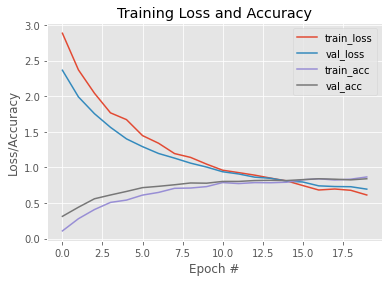

Model # 2


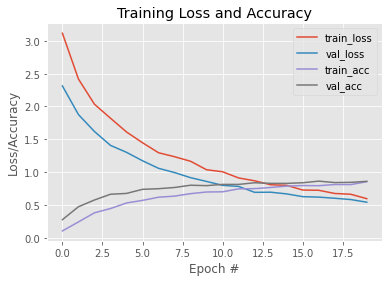

Model # 3


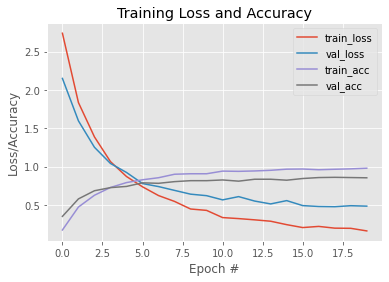

In [57]:
for i in range(len(hist_list)):
    print(f"Model # {i+1}")
    show_hist(hist_list[i])

**After seeing loss landscape, We can say that the optimization went litle differently for each base model of ensemble**

### Ensembling over the baselearners

In [72]:
ens_preds = np.array(valid_preds_list)
ens_sum = np.mean(ens_preds, 0)
ens_preds = np.argmax(ens_sum, 1)
print('Ensemble Prediction')
ens_preds

Ensemble Prediction


array([ 0,  6, 10, 16,  6,  7,  2,  3,  4,  1, 14,  7,  3,  0, 13,  8,  1,
       14,  0,  0, 15,  4,  0,  5, 13,  1,  9,  8,  3, 11,  3,  4, 13, 12,
        8,  5, 15, 10, 10,  7, 11, 16,  4, 16, 12, 11,  3,  8,  0,  3,  5,
       13, 14, 16,  2, 12, 13,  6,  3, 16,  0, 13, 13,  4, 10, 14,  0,  8,
       12,  3,  9, 12,  7,  0, 10,  3,  4, 16,  0, 11, 16,  6,  1,  5,  2,
        9, 10, 11,  9, 11, 12, 16, 15, 12,  2, 16,  3,  1, 10,  6, 13,  6,
        8, 11,  6,  8, 13,  3,  7,  7,  4,  8, 10,  6, 14,  7,  8,  0, 16,
        3, 11, 13,  8, 16, 12,  9,  5,  3,  0, 12,  3,  0, 15,  7,  1,  8,
        2, 10,  3,  3,  8,  1, 13,  4, 10,  8,  5,  3,  1,  7, 13,  3,  5,
       11,  1, 15, 11,  7, 16,  2,  7, 11,  8,  4,  3,  5, 13,  2,  3, 11,
       10, 13,  9, 10, 10, 11,  4,  8,  0,  6, 12,  8, 11,  7, 12,  8, 15,
       15, 10,  6,  9, 12, 10,  8,  3, 14,  2, 15, 14, 12, 14,  9,  6,  7,
        6, 10,  7,  8, 14,  6,  9,  1,  2,  3,  4, 14,  9,  6,  0,  2, 12,
        7, 14, 13, 11, 12

### Testing: Ensemblers and Base Learners

In [73]:
print(f"Ensemble Model and accuracy {accuracy_score(ens_preds, testY)}")
for i, preds in enumerate(valid_preds_list):
    preds = np.argmax(preds, 1)
    print(f"Model # {i+1} and accuracy {accuracy_score(preds, testY)}")

Ensemble Model and accuracy 0.9323529411764706
Model # 1 and accuracy 0.8411764705882353
Model # 2 and accuracy 0.8558823529411764
Model # 3 and accuracy 0.8558823529411764
